In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import base

In [2]:
def lengths_of_searches():
    grouped_users = base.get_dataset_and_group_by_user()
    each_user_lengths_success = {}
    each_user_lengths_fail = {}
    for username, group in grouped_users:
        this_user_length_success = []
        this_user_length_fail = []
        group = base.filter_out_mess(group)
        group_by_target = group.groupby('target_id')

        for target, target_group in group_by_target:
            # check if user found the target
            if target_group[target_group['guess_video'] == target_group['target_video']].empty:
                this_user_length_fail.append(target_group.shape[0])
            else:
                this_user_length_success.append(target_group.shape[0])
        # add result to final dictionary
        each_user_lengths_success[username] = this_user_length_success
        each_user_lengths_fail[username] = this_user_length_fail
    return each_user_lengths_success, each_user_lengths_fail

/usr/local/lib/python3.9/dist-packages/numpy/core/_methods.py:233: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/usr/local/lib/python3.9/dist-packages/numpy/core/_methods.py:194: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(
/usr/local/lib/python3.9/dist-packages/numpy/core/_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


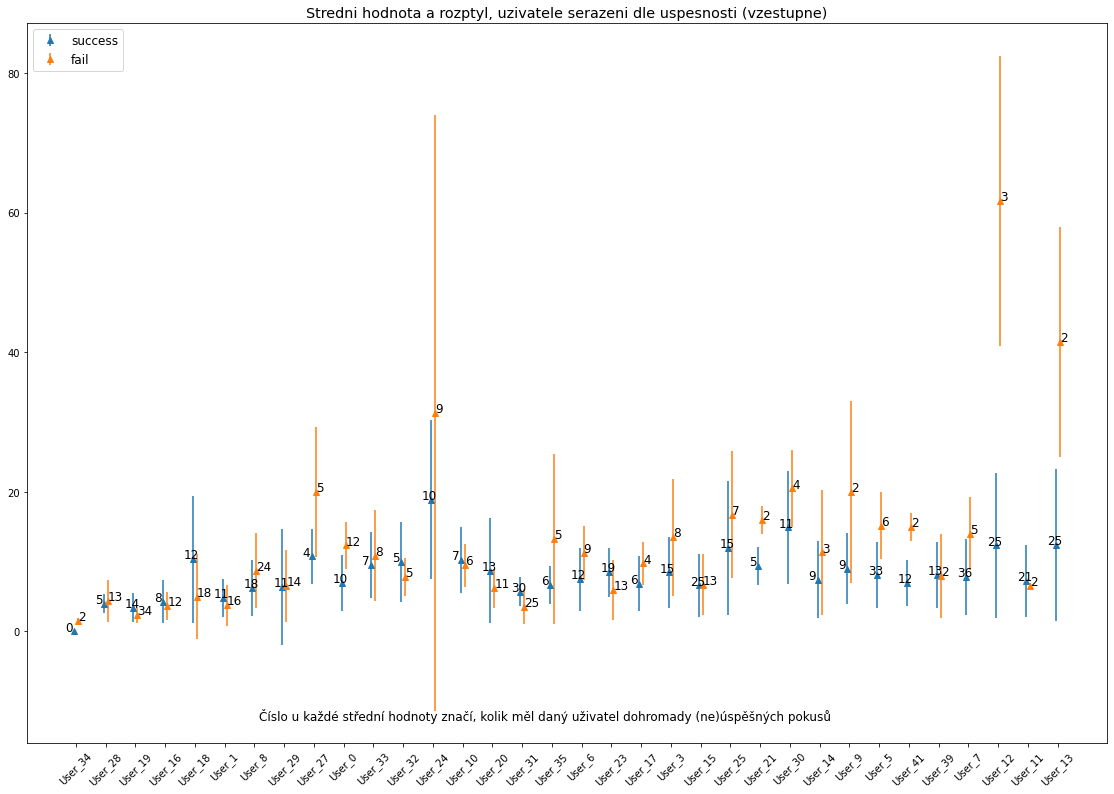

<Figure size 1440x1440 with 0 Axes>

In [3]:
%matplotlib inline

users_success_search_lengths, users_failed_search_lengths = lengths_of_searches()
x = []  # users
y_success = []  # mean (successful searches)
e_success = []  # standard deviation (successful searches)
n_success = []  # number of successful searches
y_fail = []  # mean (failed searches)
e_fail = []  # standard deviation (failed searches)
n_fail = []  # number of failed searches

order = []
for user, success_search_lengths in users_success_search_lengths.items():
    succ_length = len(success_search_lengths)
    overall_length = len(users_failed_search_lengths[user]) + succ_length
    ratio = succ_length / overall_length
    order.append((user, ratio))

order.sort(key=lambda tup: tup[1])

for (user, _) in order:
    x.append(user)
    tmp = len(users_success_search_lengths[user])
    if not tmp:
        tmp = 1
    y_success.append(sum(users_success_search_lengths[user]) / tmp)
    e_success.append(np.std(users_success_search_lengths[user]))
    n_success.append(len(users_success_search_lengths[user]))

for (user, _) in order:
    y_fail.append(sum(users_failed_search_lengths[user]) / len(users_failed_search_lengths[user]))
    e_fail.append(np.std(users_failed_search_lengths[user]))
    n_fail.append(len(users_failed_search_lengths[user]))

fig, ax = plt.subplots()
from matplotlib.transforms import ScaledTranslation
trans1 = ax.transData + ScaledTranslation(-2 / 72, 0, fig.dpi_scale_trans)
trans2 = ax.transData + ScaledTranslation(+2 / 72, 0, fig.dpi_scale_trans)
er1 = ax.errorbar(x, y_success, yerr=e_success, linestyle='None', marker='^', transform=trans1, label="success")
er2 = ax.errorbar(x, y_fail, yerr=e_fail, linestyle='None', marker='^', transform=trans2, label="fail")

iterator = 0
for i in n_fail:
    plt.rc('font', size=12)
    plt.text(x[iterator], y_fail[iterator] + 0.1, i, transform=trans2)
    iterator += 1

iterator = 0
trans1 = ax.transData + ScaledTranslation(-11 / 72, 0, fig.dpi_scale_trans)
for i in n_success:
    plt.rc('font', size=12)
    plt.text(x[iterator], y_success[iterator] + 0.1, i, transform=trans1)
    iterator += 1

plt.xticks(rotation=45)
plt.legend(loc="upper left")

txt = 'The number indicates how many (un)successful atempts were made by user'
plt.figtext(1.2, .08, txt, ha='center')
plt.title("Mean value and deviance")
plt.figure(figsize=(20,20))
fig.subplots_adjust(0,0,2.5,2.5) # make plots bigger in Jupyter
plt.show()